## Exploring iSOON's Leaked Chats

### Setup Dependencies

In [64]:
import sys
import os
import nltk
from wordcloud import WordCloud,STOPWORDS
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from matplotlib import rcParams

## Wordcloud Visualization

### Read Files

In [60]:

path = os.path.join(os.getcwd(),"isoon_chats_english.txt")
with open(path,"r") as fh:
        file_data = fh.read()
        
file_data

'nullroot\nwei592628\nI am null_whoami\nnullroot\nwei592628\nMr. Wei, where is it probably? \nnullroot\nwei592628\nTwitter has been under investigation for some time and has been under surveillance\nwei592628\nnullroot\nThen I will find an account for you later and check it out for me\nwei592628\nnullroot\nIs it convenient to make voice calls? \nnullroot\nwei592628\n\nwei592628\nnullroot\nHello Mr. Zhou, I have a few numbers that I would like you to help me with\nnullroot\nwei592628\nMr. Wei, please send it to me\nwei592628\nnullroot\n\nwei592628\nnullroot\n\nwei592628\nnullroot\n\nwei592628\nnullroot\n\nwei592628\nnullroot\n\nwei592628\nnullroot\n\nwei592628\nnullroot\n\nwei592628\nnullroot\nAll push accounts, the last one is the push account applied with g’s email address\nnullroot\nwei592628\nReceived\nwei592628\nnullroot\nThank you\nwei592628\nnullroot\nAlso, if I want to do something personal,\nHow much funding does the book platform require and how long will it take? Currently, d

### Setup Stopwords and Generate Wordcloud

In [65]:
#create stop words 
nltk.download("stopwords")

#list of stopwords
stopwords = stopwords.words("english")
stopwords.extend([
    'td',
    'tr',
    'NULL'
])

[nltk_data] Downloading package stopwords to /home/bikram-
[nltk_data]     xps/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
MAX_WORDS = 500

In [75]:
#call the wordcloud Constructor 
WC = WordCloud(
    stopwords=stopwords,
    max_words=MAX_WORDS,
    background_color="white", 
    width=1800, 
    height=800, 
    collocations=False).generate(file_data)

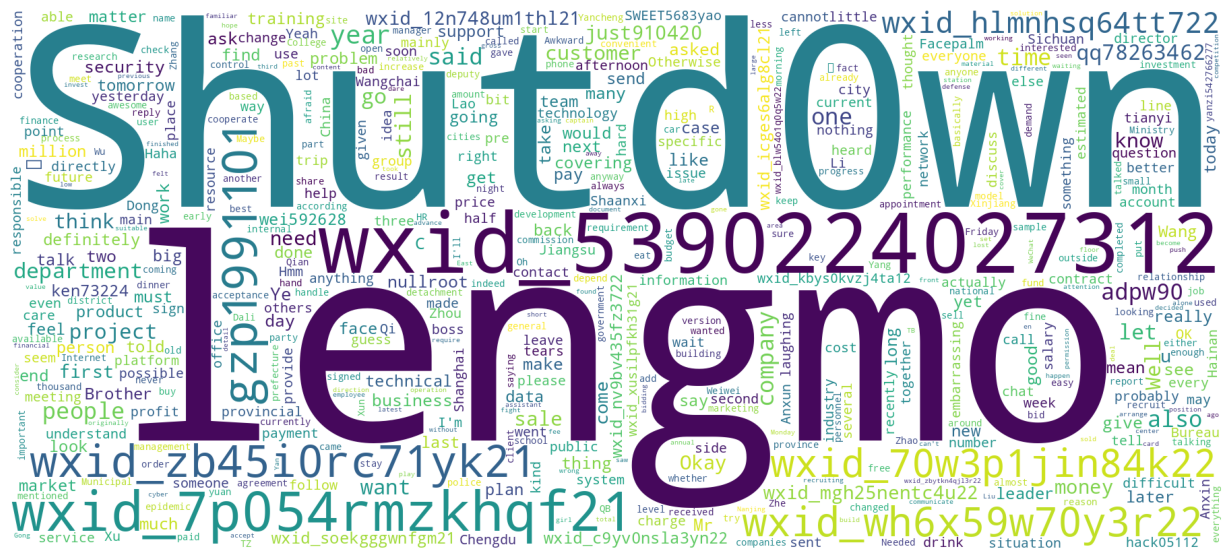

In [77]:
plt.imshow(WC)
plt.axis("off")
plt.show()

## Extract Observables

In [84]:
from ioc_finder import find_iocs, parse_domain_names

observables = parse_domain_names(file_data)

In [93]:
observables = [observable for observable in observables if not observable.endswith('-en.md')]

['baike.baidu.com',
 'drdo.gov.in',
 'finance.sina.com.cn',
 'gd9189.com',
 'm.guancha.cn',
 'm.sohu.com',
 'mahagst.gov.in',
 'meeting.tencent.com',
 'mjj-rocrpy.vaiwan.com',
 'pan.baidu.com',
 'qq.com',
 'selectarticlenewsbyid.do',
 'surl.amap.com',
 't.wss.ink',
 'translate.google.com',
 'w66588.com',
 'w81518.com',
 'www.57w66.com',
 'www.cac.gov.cn',
 'www.cyberdefensemagazine.com',
 'www.plap.cn',
 'www.w66369.com',
 'www.w81519.com',
 'www.yutainews.com',
 'zhuanlan.zhihu.com']